# EDA and PreProcessing

## Load Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read csv file

In [8]:
df = pd.read_csv('Loan_data.csv')

In [9]:
# Let's look at some statistical information about our dataframe.
df.describe()

,OBS.,CHK_ACCT,DURATION,HISTORY,FURNITURE,RADIO.TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
count,1000.000000,1000.000000,997.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,996.000000,1000.000000,...,998.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.893681,2.54500,0.181000,0.280000,0.050000,0.097000,3279.088353,1.105000,...,35.523046,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,288.819436,1.257638,12.063783,1.08312,0.385211,0.449224,0.218054,0.296106,2825.671422,1.580023,...,11.343412,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,1369.750000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,2324.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,1.000000,0.000000,0.000000,3973.750000,2.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,18424.000000,4.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


#### but this is not useful for all the variables

In [10]:
print(df.head())

   OBS.  CHK_ACCT  DURATION  HISTORY      CAR  FURNITURE  RADIO.TV  EDUCATION  \
0     1         0       6.0        4  UsedCar          0         1          0   
1     2         1      48.0        2  UsedCar          0         1          0   
2     3         3      12.0        4  UsedCar          0         0          1   
3     4         0      42.0        2  UsedCar          1         0          0   
4     5         0      24.0        3   NewCar          0         0          0   

   RETRAINING  AMOUNT   ...      AGE  OTHER_INSTALL  RENT OWN_RES  \
0           0  1169.0   ...     67.0              0     0       1   
1           0  5951.0   ...     22.0              0     0       1   
2           0  2096.0   ...     49.0              0     0       1   
3           0  7882.0   ...     45.0              0     0       0   
4           0  4870.0   ...     53.0              0     0       0   

   NUM_CREDITS  JOB  NUM_DEPENDENTS  TELEPHONE  FOREIGN  DEFAULT  
0            2    2            

In [11]:
# What type of values are stored in the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
OBS.                1000 non-null int64
CHK_ACCT            1000 non-null int64
DURATION            997 non-null float64
HISTORY             1000 non-null int64
CAR                 997 non-null object
FURNITURE           1000 non-null int64
RADIO.TV            1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              996 non-null float64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MaritalStatus       996 non-null object
CO.APPLICANT        1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE                 998 non-null float64
OTHER_INSTALL       1000 non-null int64
RENT                1000 non-null int64
OWN_RES    

#### Subset the Categorical variables for analysis

In [13]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head(10)

,CAR,MaritalStatus
0,UsedCar,Widower
1,UsedCar,Single
2,UsedCar,Single
3,UsedCar,Single
4,NewCar,Single
5,UsedCar,Single
6,UsedCar,Single
7,UsedCar,divorcee
8,NaN,divorcee
9,NewCar,divorcee


### Missing Values detection

#### Check for missing values in these (categorical) variables

In [14]:
obj_df[obj_df.isnull().any(axis=1)]

,CAR,MaritalStatus
8,NaN,divorcee
100,NaN,Single
227,UsedCar,NaN
236,NaN,NaN
257,UsedCar,NaN
296,UsedCar,NaN


#### Few Missing Values found 

#### For simplicity lets impute these variables by Mode

In [15]:
print(df.groupby(['CAR']).size())

CAR
NewCar     232
UsedCar    765
dtype: int64


In [16]:
obj_df["CAR"].value_counts()

UsedCar    765
NewCar     232
Name: CAR, dtype: int64

In [17]:
obj_df = obj_df.fillna({"CAR": "UsedCar"})

In [18]:
obj_df[obj_df.isnull().any(axis=1)]

,CAR,MaritalStatus
227,UsedCar,NaN
236,UsedCar,NaN
257,UsedCar,NaN
296,UsedCar,NaN


In [19]:
print(df.groupby(['MaritalStatus']).size())

MaritalStatus
Married      30
Single      506
Widower     343
divorcee    117
dtype: int64


In [20]:
obj_df = obj_df.fillna({"MaritalStatus": "Single"})

In [21]:
obj_df[obj_df.isnull().any(axis=1)]

,CAR,MaritalStatus


#### Missing values imputed by Mode

#### Check for missing values in dataframe

In [22]:
print(df.isnull().sum())

OBS.                0
CHK_ACCT            0
DURATION            3
HISTORY             0
CAR                 3
FURNITURE           0
RADIO.TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              4
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MaritalStatus       4
CO.APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 2
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
dtype: int64


#### Remove Rows With Missing Values

In [23]:
df_imputed = df.dropna()

In [24]:
print(df_imputed.isnull().sum())

OBS.                0
CHK_ACCT            0
DURATION            0
HISTORY             0
CAR                 0
FURNITURE           0
RADIO.TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MaritalStatus       0
CO.APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
dtype: int64


In [25]:
# This will remove the rows with Missing value in existing data frame
# df.dropna(inplace=True)

#### subset numerical variables

In [26]:
df_num = df.select_dtypes(include=['float64'])

In [27]:
print(df_num.head())

   DURATION  AMOUNT   AGE
0       6.0  1169.0  67.0
1      48.0  5951.0  22.0
2      12.0  2096.0  49.0
3      42.0  7882.0  45.0
4      24.0  4870.0  53.0


In [28]:
# Check for number of missing value
print(df_num.isnull().sum())

DURATION    3
AMOUNT      4
AGE         2
dtype: int64


#### Impute missing values with mean values

In [29]:
df_num_mean = df_num.fillna(df_num.mean())

# this will update the existing data frame
# df.fillna(df.mean(), inplace=True)

In [30]:
# Check for number of missing value
print(df_num_mean.isnull().sum())


DURATION    0
AMOUNT      0
AGE         0
dtype: int64


#### Impute missing values with median values


In [31]:
df_num_median = df_num.fillna(df_num.median())

# this will update the existing data frame
# df.fillna(df.median(), inplace=True)

In [32]:
# Check for number of missing value
print(df_num_median.isnull().sum())

DURATION    0
AMOUNT      0
AGE         0
dtype: int64


In [33]:
# make a copy of  numeric data frame 
df_num_cp1 = df_num.copy()
df_num_cp2 = df_num.copy()
print(df_num_cp1.head())
print(df_num_cp2.head())

   DURATION  AMOUNT   AGE
0       6.0  1169.0  67.0
1      48.0  5951.0  22.0
2      12.0  2096.0  49.0
3      42.0  7882.0  45.0
4      24.0  4870.0  53.0
   DURATION  AMOUNT   AGE
0       6.0  1169.0  67.0
1      48.0  5951.0  22.0
2      12.0  2096.0  49.0
3      42.0  7882.0  45.0
4      24.0  4870.0  53.0


#### Impute missing values with ZERO 

In [34]:
df_num_cp1.fillna(0).head()

,DURATION,AMOUNT,AGE
0,6.0,1169.0,67.0
1,48.0,5951.0,22.0
2,12.0,2096.0,49.0
3,42.0,7882.0,45.0
4,24.0,4870.0,53.0


#### Impute missing values by Fill gaps forward

In [35]:
df_num_cp2.fillna(method='pad').head()

,DURATION,AMOUNT,AGE
0,6.0,1169.0,67.0
1,48.0,5951.0,22.0
2,12.0,2096.0,49.0
3,42.0,7882.0,45.0
4,24.0,4870.0,53.0


#### Impute Missing value by imputer

In [36]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
transformed_values = imputer.fit_transform(df_num)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())


0


In [37]:
# this will update the existing data frame
df.fillna(df.mean(), inplace=True)

### Working with categorical varibles

In [38]:
# Convert variable(s) to category
df[["CAR", "MaritalStatus"]] = df[["CAR", "MaritalStatus"]].astype('category')

In [49]:
# What type of values are stored in the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
OBS.                1000 non-null int64
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null float64
HISTORY             1000 non-null int64
CAR                 997 non-null category
FURNITURE           1000 non-null int64
RADIO.TV            1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null float64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MaritalStatus       996 non-null category
CO.APPLICANT        1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE                 1000 non-null float64
OTHER_INSTALL       1000 non-null int64
RENT                1000 non-null int64
OWN_

### Label Encoding

#### Label Encoding : pandas

In [50]:
df["CAR_cat"] = df["CAR"].cat.codes

In [51]:
print(df[["CAR","CAR_cat"]].head())

       CAR  CAR_cat
0  UsedCar        1
1  UsedCar        1
2  UsedCar        1
3  UsedCar        1
4   NewCar        0


In [52]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
CAR              1000 non-null object
MaritalStatus    1000 non-null object
CAR_Lcode        1000 non-null int64
dtypes: int64(1), object(2)
memory usage: 23.5+ KB


#### Label Encoding : sklearn

In [53]:
from sklearn.preprocessing import LabelEncoder

lbl_encod = LabelEncoder()
obj_df["CAR_Lcode"] = lbl_encod.fit_transform(obj_df["CAR"])


In [54]:
obj_df[["CAR", "CAR_Lcode"]].head(11)

,CAR,CAR_Lcode
0,UsedCar,1
1,UsedCar,1
2,UsedCar,1
3,UsedCar,1
4,NewCar,0
5,UsedCar,1
6,UsedCar,1
7,UsedCar,1
8,UsedCar,1
9,NewCar,0


#### Onehot Encoding

In [55]:
df_dummies = pd.get_dummies(df[['CAR', 'MaritalStatus']])
df_dummies.head()

,CAR_NewCar,CAR_UsedCar,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widower,MaritalStatus_divorcee
0,0,1,0,0,1,0
1,0,1,0,1,0,0
2,0,1,0,1,0,0
3,0,1,0,1,0,0
4,1,0,0,1,0,0


#### Combine Numerical and Dummy variables

In [56]:
df_combined = pd.concat([df_num, df_dummies], axis=1)
df_combined.head()

,DURATION,AMOUNT,AGE,CAR_NewCar,CAR_UsedCar,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widower,MaritalStatus_divorcee
0,6.0,1169.0,67.0,0,1,0,0,1,0
1,48.0,5951.0,22.0,0,1,0,1,0,0
2,12.0,2096.0,49.0,0,1,0,1,0,0
3,42.0,7882.0,45.0,0,1,0,1,0,0
4,24.0,4870.0,53.0,1,0,0,1,0,0


In [57]:
# Convert all variables to category
# df= df.astype('category')

In [58]:
# Convert all variables to float
# df[["DURATION", "AMOUNT", "AGE"]] = df[["DURATION", "AMOUNT", "AGE"]].astype('float')

In [59]:
# Let's look at some statistical information about our dataframe.
df.describe()

,OBS.,CHK_ACCT,DURATION,HISTORY,FURNITURE,RADIO.TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,...,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT,CAR_cat
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.893681,2.54500,0.181000,0.280000,0.050000,0.097000,3279.088353,1.105000,...,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000,0.762000
std,288.819436,1.257638,12.045656,1.08312,0.385211,0.449224,0.218054,0.296106,2820.008748,1.580023,...,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487,0.433063
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,1371.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,2326.500000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,1.000000,0.000000,0.000000,3972.250000,2.000000,...,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,18424.000000,4.000000,...,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000


### Outliers Detection

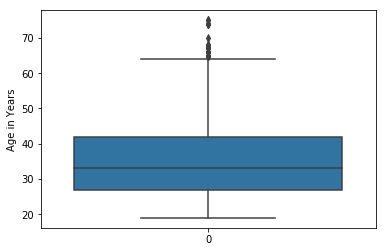

In [60]:
sns.boxplot(data=df["AGE"])
plt.ylabel("Age in Years");

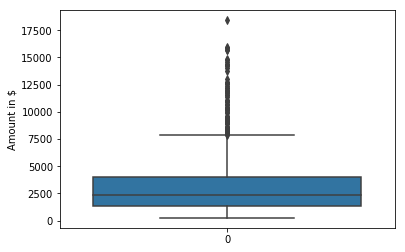

In [61]:
sns.boxplot(data=df["AMOUNT"])
plt.ylabel("Amount in $");

#### Outliers detection by z-score

In [62]:
from scipy import stats
import numpy as np


In [63]:
z = np.abs(stats.zscore(df["AGE"]))
print(z)

[2.77908240e+00 1.19394207e+00 1.18987261e+00 8.36714884e-01
 1.54303035e+00 4.61794428e-02 1.54303035e+00 4.61794428e-02
 2.24934581e+00 6.64205472e-01 9.29073770e-01 1.01736320e+00
 1.19394207e+00 2.16105637e+00 6.64205472e-01 3.11047741e-01
 1.54303035e+00 9.29073770e-01 7.48425451e-01 3.99337174e-01
 1.10158318e+00 7.48425451e-01 1.10158318e+00 7.48425451e-01
 8.40784337e-01 4.21099899e-02 3.06978288e-01 5.71846586e-01
 1.34468875e-01 2.42592467e+00 4.21099899e-02 7.52494904e-01
 4.87626606e-01 1.89618808e+00 2.22758308e-01 9.29073770e-01
 3.99337174e-01 1.30399423e-01 1.30399423e-01 1.01736320e+00
 4.87626606e-01 8.40784337e-01 7.48425451e-01 1.01736320e+00
 1.98447751e+00 4.61794428e-02 3.06978288e-01 1.10565264e+00
 3.06978288e-01 6.27334150e-16 5.75916039e-01 4.87626606e-01
 9.29073770e-01 3.99337174e-01 1.89618808e+00 8.40784337e-01
 1.45474091e+00 3.99337174e-01 1.10565264e+00 1.10565264e+00
 7.52494904e-01 1.27816205e+00 2.24934581e+00 9.29073770e-01
 8.40784337e-01 1.101583

In [64]:
threshold = 3
print(np.where(z > 3))

(array([163, 186, 330, 430, 536, 606, 756], dtype=int64),)


In [65]:
df_Age_out = df["AGE"][(z > 3)]

In [66]:
df_Age_out

163    70.0
186    74.0
330    75.0
430    74.0
536    75.0
606    74.0
756    74.0
Name: AGE, dtype: float64

In [67]:
df["AGE"][163]

70.0

#### Outliers detection by Interquartile Range (IQR)

In [68]:
Q1 = df["AGE"].quantile(0.25)
Q3 = df["AGE"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

15.0


In [69]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DURATION      12.0
AMOUNT      2604.0
AGE           15.0
dtype: float64


In [70]:
print((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR)))

     DURATION  AMOUNT    AGE
0       False   False   True
1        True   False  False
2       False   False  False
3       False    True  False
4       False   False  False
5       False    True  False
6       False   False  False
7       False   False  False
8       False   False  False
9       False   False  False
10      False   False  False
11       True   False  False
12      False   False  False
13      False   False  False
14      False   False  False
15      False   False  False
16      False   False  False
17      False    True  False
18      False    True  False
19      False   False  False
20      False   False  False
21      False   False  False
22      False   False  False
23      False   False  False
24      False   False  False
25      False   False  False
26      False   False  False
27      False   False  False
28      False   False  False
29       True   False  False
..        ...     ...    ...
970     False   False  False
971     False   False  False
972     False 

### Some graphs

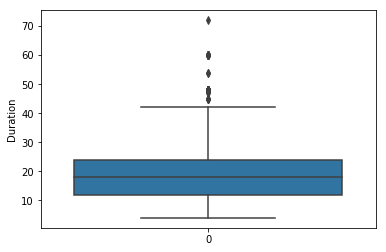

In [71]:
sns.boxplot(data=df["DURATION"])

plt.ylabel("Duration");

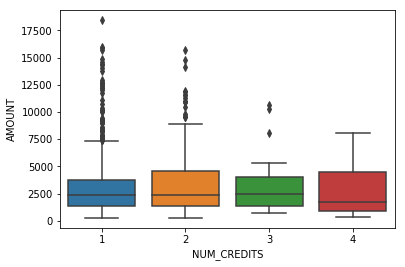

In [72]:

sns.boxplot( x=df["NUM_CREDITS"], y=df["AMOUNT"] )

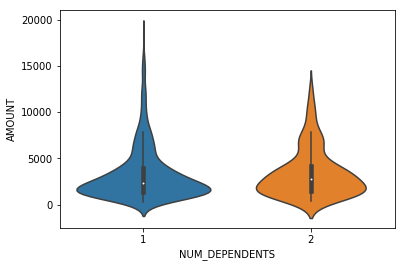

In [73]:
sns.violinplot( x=df["NUM_DEPENDENTS"], y=df["AMOUNT"] )


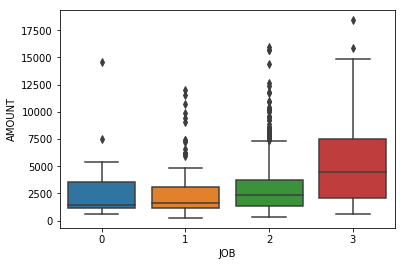

In [74]:
sns.boxplot( x=df["JOB"], y=df["AMOUNT"] )

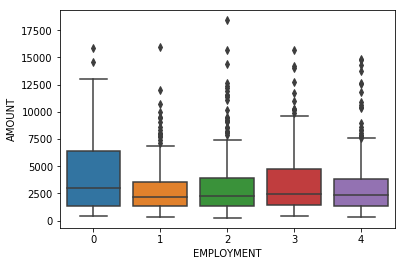

In [75]:
sns.boxplot( x=df["EMPLOYMENT"], y=df["AMOUNT"] )

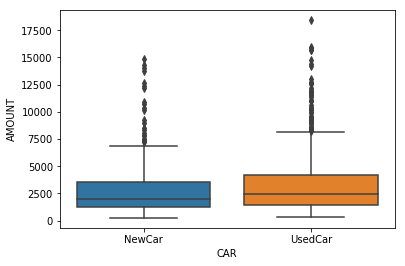

In [76]:
sns.boxplot( x=df["CAR"], y=df["AMOUNT"] )

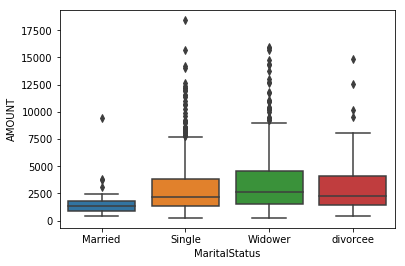

In [77]:
sns.boxplot( x=df["MaritalStatus"], y=df["AMOUNT"] )

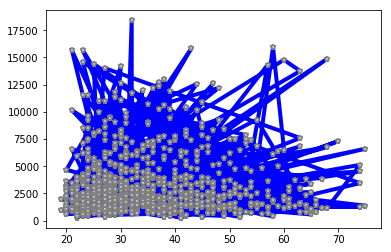

In [78]:
plt.plot(df["AGE"], df["AMOUNT"], '-p', color='blue',
         markersize=5, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)


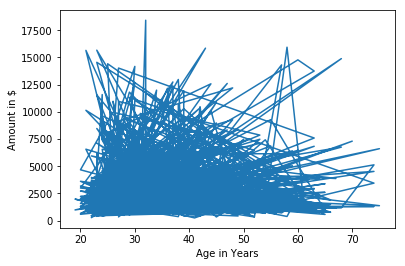

In [79]:
plt.plot(df["AGE"], df["AMOUNT"])
plt.xlabel("Age in Years")
plt.ylabel("Amount in $");

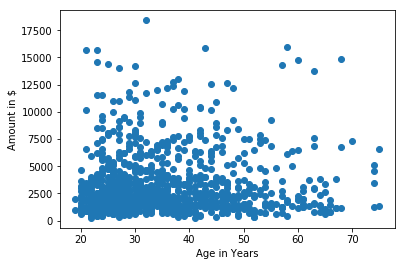

In [80]:
plt.scatter(df["AGE"], df["AMOUNT"])
plt.xlabel("Age in Years")
plt.ylabel("Amount in $");

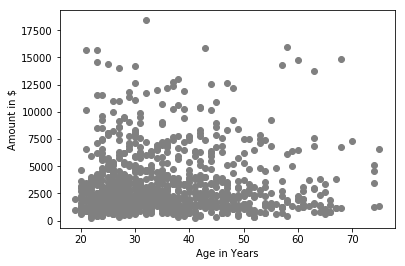

In [81]:
plt.scatter(df["AGE"], df["AMOUNT"],
           color='gray')
plt.xlabel("Age in Years")
plt.ylabel("Amount in $");

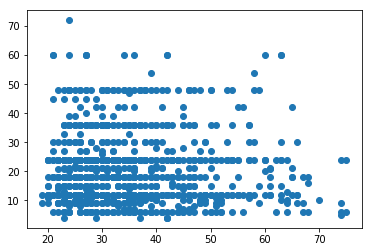

In [82]:
plt.scatter(df["AGE"], df["DURATION"])

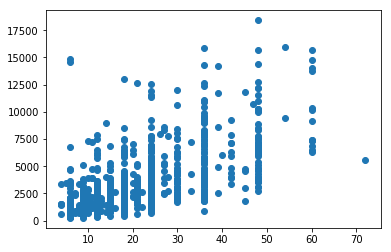

In [83]:
plt.scatter(df["DURATION"], df["AMOUNT"])

### Correlation Analysis

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

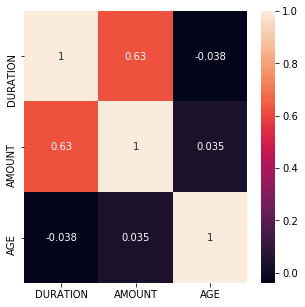

In [87]:
plt.figure(figsize = (5,5))
sns.heatmap(df_num.corr(),annot = True)

### Feature Scaling

#### Standardizing

In [88]:
print(df_num.head())

   DURATION  AMOUNT   AGE
0       6.0  1169.0  67.0
1      48.0  5951.0  22.0
2      12.0  2096.0  49.0
3      42.0  7882.0  45.0
4      24.0  4870.0  53.0


In [90]:
df_num = df_num.fillna(df_num.mean())
print(df_num.isnull().sum())

DURATION    0
AMOUNT      0
AGE         0
dtype: int64


In [91]:
from sklearn.preprocessing import StandardScaler
df_num_std = StandardScaler().fit_transform(df_num)

In [92]:
print(df_num_std)

[[-1.23705454 -0.74863037  2.7790824 ]
 [ 2.25142428  0.94795756 -1.19394207]
 [-0.73870043 -0.4197435   1.18987261]
 ...
 [-0.73870043 -0.87812736  0.21868886]
 [ 2.00224722 -0.50879485 -1.10565264]
 [ 2.00224722  0.46012644 -0.7524949 ]]


#### Min-Max Normalisation:

In [94]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

In [95]:
df_num_after_min_max_scaler = min_max_scaler.fit_transform(df_num)

In [96]:
print("\nAfter MIN MAX Scaling : \n",df_num_after_min_max_scaler)


After MIN MAX Scaling : 
 [[0.02941176 0.05056674 0.85714286]
 [0.64705882 0.31368989 0.05357143]
 [0.11764706 0.10157368 0.53571429]
 ...
 [0.11764706 0.03048311 0.33928571]
 [0.60294118 0.08776274 0.07142857]
 [0.60294118 0.23803235 0.14285714]]
